In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import walk
import seaborn as sns
import json

In [2]:
epi_path=["epi03_03","epi03_3","epi03_15","epi03_30"]
raio_path=["R03","R04","R05","R06"]

epi_path=["epi03_03"]
raio_path=["R03"]


mypath=[]

for i in epi_path:
    for j in raio_path:
        mypath.append(i+"/"+j)

print(mypath)
nsim=len(mypath)
print(nsim)


['epi03_03/R03']
1


In [3]:
dirnames1=[]
for paths in mypath:
    for (dirpath, dirnames, filenames) in walk(paths):
#        filenamesdata.extend(filenames)
        for kk in dirnames:
            if(dirnames!="__pycache__"):
                dirnames1.append(dirpath+"/"+kk+"/data")
        break

#print(dirnames1)

filenamesdata = []
filenamesdataxyz = []

for paths in dirnames1:
    for (dirpath, dirnames, filenames) in walk(paths):
#        filenamesdata.extend(filenames)
#        print(filenames)
        match=[paths+"/"+s for s in filenames if "data-tempo-" in s]
        matchxyz=[paths+"/"+s for s in filenames if "Evol_Rcell_" in s]
        filenamesdata.append(match[0])
        filenamesdataxyz.append(matchxyz[0])
       
        break



In [4]:
#"SimIniPar.json"
filepath=str(filenamesdataxyz[0:1]).split("data")
namejson=filepath[0][2:]+str("SimIniPar.json")
print(namejson)

with open(namejson) as f:  
    data = json.load(f)
    dfjson=pd.DataFrame(data)

print(str(filenamesdataxyz[0:1]))
!ls epi03_03/R03/2021_05_18-02_37_35_
#filedatajson=open(namejson,'r')
#filedatajson.close()

epi03_03/R03/2021_05_18-02_37_35_/SimIniPar.json
['epi03_03/R03/2021_05_18-02_37_35_/data/Evol_Rcell_16.0epi03_0.3.xyz']
2021_05_18-02_37_35_.html  data  images  SimIniPar.json


In [5]:
dfjson.head(50)

for key, value in data.items():
    print(key)

Cell


In [6]:
Nele=len(data['Cell'])
json_encode=[]
for i in range(Nele):
    data2=data['Cell'][i]
    json_encode.append( str(data2.keys())[12:-3])
    print(str(data2.keys())[12:-3],i)

SimulName 0
a0 1
dt 2
Rcell 3
Rnuc 4
rc1 5
rc2 6
raiocorte 7
Npa 8
ListTipos 9
CombTipos 10
kmolaang 11
sigij 12
epiij 13
kfene 14
rfene 15
drfene 16
pos 17
vel 18
massa 19
tipo 20


In [7]:
print(json_encode)

select=json_encode[13]

for i in range(len(json_encode)):
    if (json_encode[i]==select):
        infor=data['Cell'][i].get(select)
        print(select , '=', infor[3])


['SimulName', 'a0', 'dt', 'Rcell', 'Rnuc', 'rc1', 'rc2', 'raiocorte', 'Npa', 'ListTipos', 'CombTipos', 'kmolaang', 'sigij', 'epiij', 'kfene', 'rfene', 'drfene', 'pos', 'vel', 'massa', 'tipo']
epiij = 0.3


In [19]:
for path in filenamesdataxyz:
    print(path)

epi03_03/R03/2021_05_18-02_37_35_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-01_12_46_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-08_16_42_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-11_46_44_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-08_55_09_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-09_37_27_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-10_21_00_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-11_04_11_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-12_29_44_/data/Evol_Rcell_16.0epi03_0.3.xyz
epi03_03/R03/2021_05_18-01_55_19_/data/Evol_Rcell_16.0epi03_0.3.xyz


In [8]:
label=[]
cont=0

df = pd.DataFrame(columns=['time','xcm','ycm','vxcm','vycm','epi03','R'])

for name in filenamesdataxyz[0:1]:
    print(name)
    namesplited=name.split('/')
    cont+=1
    
    filedata=open(name,'r')
    
    time=[]
    xcm=[]
    ycm=[]
    vxcm=[]
    vycm=[]
    
    Pos=[]
    Vel=[]
    tipo=[]    
    cont=0

    label.append(name)
    for line in filedata:
        line1=line.replace("\n","")
        line1=line1.split(" ")
        line1 = [x for x in line1 if x != '']

        LenArray=len(line1)
        
        if ( LenArray==1 ):
            if (cont==0) :
                NumPar=np.int(line1[0])
#                print(cont,"Numpar",NumPar)
            elif (cont==1) :
                Tempo=np.float(line1[0])
                time.append(Tempo)
#                print(cont,"Tempo",Tempo)
            cont+=1 
        else: 
#            print(cont,LenArray,NumPar)
            tipo.append(line1[0])
            Pos.append( [ np.float(line1[1]),np.float(line1[2]),np.float(line1[3]) ] ) 
            Vel.append( [ np.float(line1[4]),np.float(line1[5]),np.float(line1[6]) ] )
            cont+=1
        if (cont%(NumPar+2)==0):
#            print(np.shape(Pos))
#            CompGlobal.append([Pos,Vel,tipo])
#            xcm.append( np.mean(Pos,axis=0)[0]  )
#            ycm.append( np.mean(Pos,axis=0)[1]  )
#            vxcm.append( np.mean(Vel,axis=0)[0]  )
#            vycm.append( np.mean(Vel,axis=0)[1]  )
            
#            xicm=np.mean(Pos,axis=0)[0]
#            yicm=np.mean(Pos,axis=0)[1]
#            vxicm=np.mean(Vel,axis=0)[0]
#            vyicm=np.mean(Vel,axis=0)[1]

#            dictionary={'time': Tempo,'xcm': xicm ,'ycm': yicm, 'vxcm': vxicm ,'vycm': vyicm, 'epi03': namesplited[0][6:],'R': namesplited[1][1:]}
#            df = df.append(dictionary, ignore_index=True)
#            print( Tempo, np.mean(Pos,axis=0)[0] )
#            Pos=[]
#            Vel=[]
#            tipo=[]
            cont=0
            
    print(np.shape(Pos))
    print(np.shape(time[0]))

    Pos=np.asarray(Pos)
    time=np.asarray(time)
    


epi03_03/R03/2021_05_18-02_37_35_/data/Evol_Rcell_16.0epi03_0.3.xyz
(572427, 3)
()


In [9]:
print(np.shape(Pos))


(572427, 3)


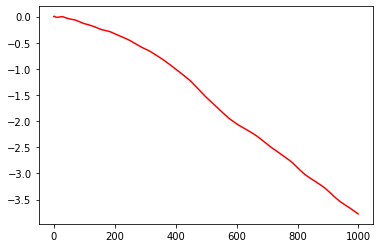

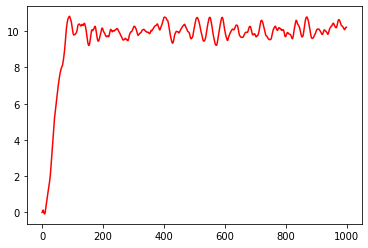

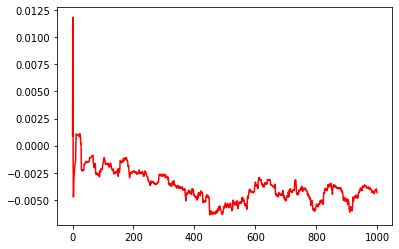

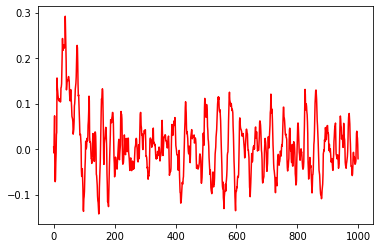

In [17]:
#calcula xcm,ycm,vxcm,vycm
Ntemp=len(time)
xcm=[]
ycm=[]
vxcm=[]
vycm=[]
for ii in range(0,Ntemp):          
    xi=0.0
    yi=0.0
    vxi=0.0
    vyi=0.0
    for j in range(0,NumPar):
        ti=ii*NumPar+j
        xi+=Pos[ti][0]
        yi+=Pos[ti][1]
        vxi+=Vel[ti][0]
        vyi+=Vel[ti][1]
    xcm.append(xi/NumPar)
    ycm.append(yi/NumPar)
    vxcm.append(vxi/NumPar)
    vycm.append(vyi/NumPar)

plt.plot(time,xcm,'r-')
plt.show()
plt.plot(time,ycm,'r-')
plt.show()
plt.plot(time,vxcm,'r-')
plt.show()
plt.plot(time,vycm,'r-')
plt.show()

#            print(np.shape(Pos))
#            CompGlobal.append([Pos,Vel,tipo])
#            xcm.append( np.mean(Pos,axis=0)[0]  )
#            ycm.append( np.mean(Pos,axis=0)[1]  )
#            vxcm.append( np.mean(Vel,axis=0)[0]  )
#            vycm.append( np.mean(Vel,axis=0)[1]  )
            
#            xicm=np.mean(Pos,axis=0)[0]
#            yicm=np.mean(Pos,axis=0)[1]
#            vxicm=np.mean(Vel,axis=0)[0]
#            vyicm=np.mean(Vel,axis=0)[1]

#            dictionary={'time': Tempo,'xcm': xicm ,'ycm': yicm, 'vxcm': vxicm ,'vycm': vyicm, 'epi03': namesplited[0][6:],'R': namesplited[1][1:]}
#            df = df.append(dictionary, ignore_index=True)
#            print( Tempo, np.mean(Pos,axis=0)[0] )
#            Pos=[]
#            Vel=[]
#            tipo=[]

In [11]:
dr2ListSe=[]
dr2ListMo=[]
dr2ListAl=[]
dr2ListSi=[]
    
Ntemp=len(time)
print(Ntemp)
for i in range(1,int(Ntemp/2)):
    dr2Se=[]
    dr2Mo=[]
    dr2Al=[]
    dr2Si=[]
        
#    if (i%100==0):
#        print(i)

    for ii in range(200,Ntemp-i):          
#        print(i,ii)
        for j in range(0,NumPar):
            if (tipo[i*NumPar+j]=='Se'):
                tf=(i+ii)*NumPar+j
                ti=ii*NumPar+j
#                print(tf,ti,tf-ti)
                dx=Pos[tf][0]-Pos[ti][0]
                dy=Pos[tf][1]-Pos[ti][1]
                dr2Se.append([dx,dy])
            
            if (tipo[i*NumPar+j]=='Mo'):
                tf=(i+ii)*NumPar+j
                ti=ii*NumPar+j
#                print(tf,ti,tf-ti)
                dx=Pos[tf][0]-Pos[ti][0]
                dy=Pos[tf][1]-Pos[ti][1]
                dr2Mo.append([dx,dy])
            
            if (tipo[i*NumPar+j]=='Al'):
                tf=(i+ii)*NumPar+j
                ti=ii*NumPar+j
#                print(tf,ti,tf-ti)
                dx=Pos[tf][0]-Pos[ti][0]
                dy=Pos[tf][1]-Pos[ti][1]
                dr2Al.append([dx,dy])
            
            if (tipo[i*NumPar+j]=='Si'):
                tf=(i+ii)*NumPar+j
                ti=ii*NumPar+j
#                print(tf,ti,tf-ti)
                dx=Pos[tf][0]-Pos[ti][0]
                dy=Pos[tf][1]-Pos[ti][1]
                dr2Si.append([dx,dy])
            
#    print(dr2Se[0:20])
    dr2ListSe.append(np.asarray(dr2Se))
    dr2ListMo.append(np.asarray(dr2Mo))
    dr2ListAl.append(np.asarray(dr2Al))
    dr2ListSi.append(np.asarray(dr2Si))
    
dr2ListSe=np.asarray(dr2ListSe)
dr2ListMo=np.asarray(dr2ListMo)
dr2ListAl=np.asarray(dr2ListAl)
dr2ListSi=np.asarray(dr2ListSi)

print('ok')


999
ok


/home/radias-s20/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


160398
<class 'numpy.ndarray'>
[[ 0.27662994 -0.67233548]
 [ 0.54669706 -0.96690457]
 [ 0.70180438 -0.79665441]
 ...
 [ 0.22623384 -0.13541651]
 [ 0.22995588 -0.20886044]
 [ 0.23680959 -0.21461748]]
[0.27662994 0.54669706 0.70180438 ... 0.22623384 0.22995588 0.23680959]
[-0.67233548 -0.96690457 -0.79665441 ... -0.13541651 -0.20886044
 -0.21461748]


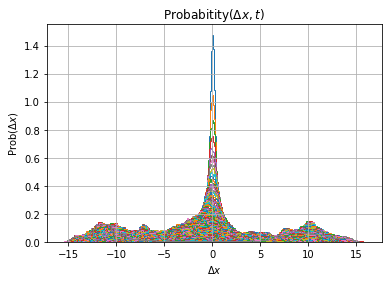

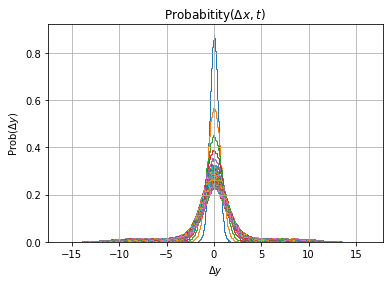

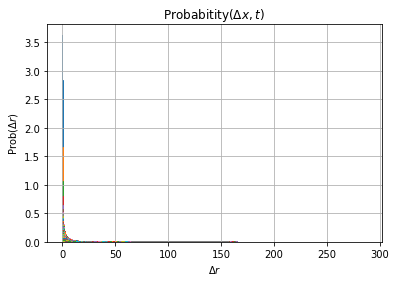

In [12]:
print(len(dr2ListSe[0]))
print(type(dr2ListSe[0]))
print(dr2ListSe[0][:])
print(dr2ListSe[0][:,0])
print(dr2ListSe[0][:,1])

for jj in range(0,int(Ntemp/2)-1):
    x=dr2ListSe[jj][:,0]
    # the histogram of the data
    n, bins, patches = plt.hist(x, 100, density=True, histtype='step', label='t='+str(jj+1))
    
#    plt.legend(loc='upper left')

    plt.xlabel('$\Delta x$')
    plt.ylabel('Prob($\Delta x$)')
    plt.title('Probabitity($\Delta x,t$) ')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    #plt.xlim(40, 160)
    #plt.ylim(0, 0.03)
    plt.grid(True)
    
plt.show()



for jj in range(0,int(Ntemp/2)-1):
    x=dr2ListSe[jj][:,1]
    # the histogram of the data
    n, bins, patches = plt.hist(x, 100, density=True,histtype='step', label='t='+str(jj+1))
    
#    plt.legend(loc='upper left')

    plt.xlabel('$\Delta y$')
    plt.ylabel('Prob($\Delta y$)')
    plt.title('Probabitity($\Delta x,t$) ')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    #plt.xlim(40, 160)
    #plt.ylim(0, 0.03)
    plt.grid(True)
    
plt.show()


for jj in range(0,int(Ntemp/2)-1):
    x=dr2ListSe[jj][:,0]**2+dr2ListSe[jj][:,1]**2
    # the histogram of the data
    n, bins, patches = plt.hist(x, 100, density=True,histtype='step', label='t='+str(jj+1))
    
#    plt.legend(loc='upper left')

    plt.xlabel('$\Delta r$')
    plt.ylabel('Prob($\Delta r$)')
    plt.title('Probabitity($\Delta x,t$) ')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    #plt.xlim(40, 160)
    #plt.ylim(0, 0.03)
    plt.grid(True)
    
plt.show()

<ipython-input-14-c0436891bf75>:6: RuntimeWarning: divide by zero encountered in log
  x=np.log(np.asarray(x))


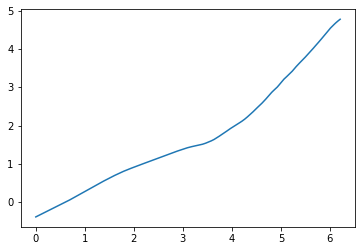

In [14]:
x=[]
y=[]
for jj in range(0,int(Ntemp/2)-1):
    y.append(np.sum(dr2ListSe[jj][:,0]**2+dr2ListSe[jj][:,1]**2)/len(dr2ListSe[jj][:,0]))
    x.append(jj)
x=np.ln(np.asarray(x))
y=np.ln(np.asarray(y))

#print(x,y)
plt.plot(x,y)

#plt.hist(x, 100, density=True,histtype='step', label='t='+str(jj+1))
    
#plt.legend(loc='upper left')
#plt.xlabel('$\Delta r$')
#plt.ylabel('Prob($\Delta r$)')
#plt.title('Probabitity($\Delta x,t$) ')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
#plt.grid(True)
    
#plt.show()

In [ ]:
plt.plot(time[1:700],dr2ListSe[1:700]/(4*time[1:700]),'r-', label='0-Membrana')
plt.legend(loc='lower right')
plt.show()


In [ ]:
df.head()